# I. Linear Regression
- Making a sample scatter plot
- Solving via normal equation method
- Solving via gradient descent method

## METHOD 1A of 2: Normal Equation w/ Manual Calculation

We might not be able to leapfrog to an answer in y = mx +b format, but we can find a "mid-point" on the best-fit line by finding the average X and Y values. Then we can find calculate slope using a method described in this [YouTube vid](https://www.youtube.com/watch?v=GhrxgbQnEEU&ab_channel=EugeneO%27Loughlin). Knowing the slope (m) and a single point on the line (x and y baked in), we can isolate the b. Below is a demonstration of calculation slope "m":

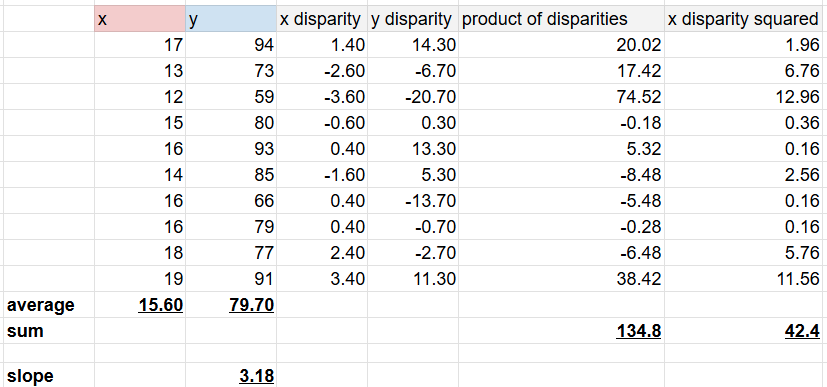<br>

79.70 = (3.18 * 15.60) + b<br>
b = 79.70 - (49.61) = 30.09<br>
Therefore, the best-fit line is __y = 3.18x + 30.09__

## METHOD 1B of 2: Normal Equation, Automated w/ NumPy
I'm generating a dataset with approximately 3 as a slope and 4 as a y-intercept

The final best-fit line won't hit exactly, because of randomization. The final best-fit line might be something like y = 2.9(x) + 4.1

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

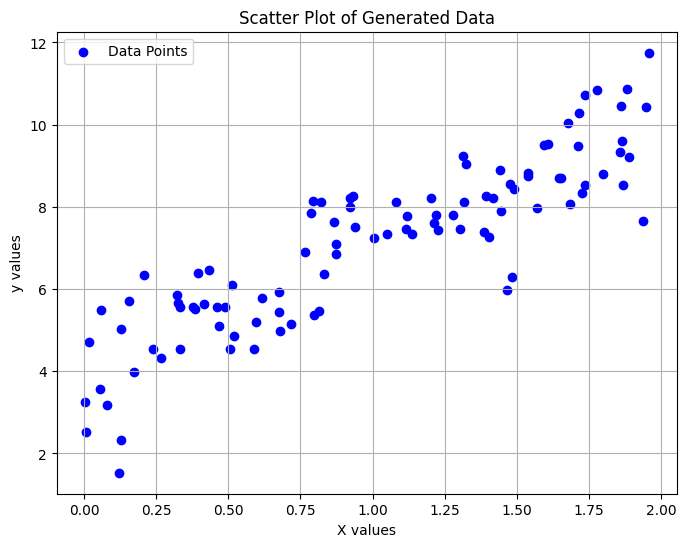

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data Points")
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Scatter Plot of Generated Data")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

intercept, slope = theta_best[0, 0], theta_best[1, 0]

print(f"Intercept (b): {intercept}")
print(f"Slope (m): {slope}")
print(f"Equation of the best-fit line: y = {slope:.2f}x + {intercept:.2f}")

Intercept (b): 4.029905883064831
Slope (m): 2.935004116680641
Equation of the best-fit line: y = 2.94x + 4.03


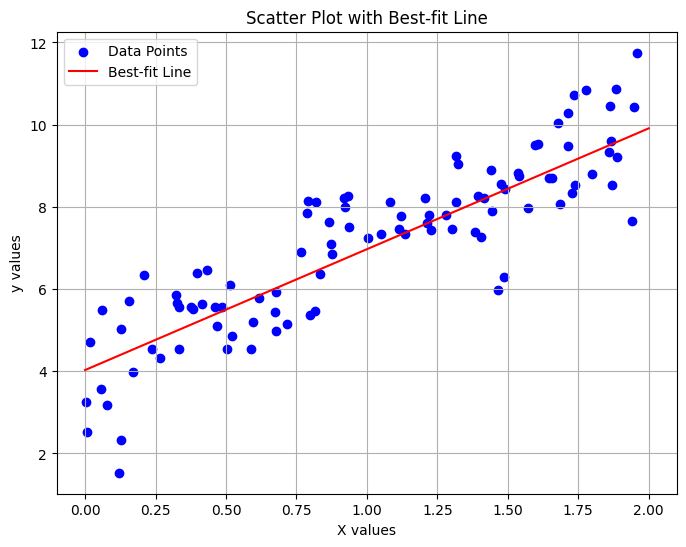

In [16]:
intercept = 4.03
slope = 2.94

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data Points")

X_new = np.array([[0], [2]])
y_predict = slope * X_new + intercept
plt.plot(X_new, y_predict, "r-", label="Best-fit Line")  # Red best fit line

plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Scatter Plot with Best-fit Line")
plt.legend()
plt.grid(True)
plt.show()

# Gradient Descent
Finding the best answer through iterative experiments instead of direct calculation.

### How does it work?
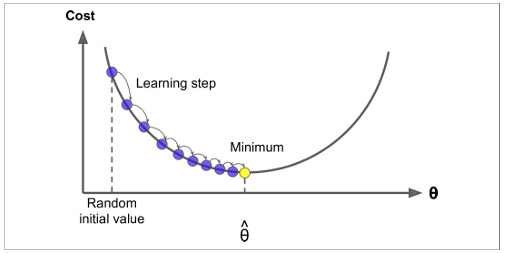<br>

"Cost" is the data science way of saying "error", or disparity between predictions and actuals. Our goal is to shift parameters around, see where the bigger drop is (we are looking for the most dramatic, steepest drop in error), and increment values towards the minimum error. The the rate which we shift parameters horizontally is known as the __"learning rate"__. A small and conservative learning rate will require more iterations to converge to the true bottom. A large and aggressive learning rate will likely step over the true minimum.

## 3 Different Methods of Gradient Descent
Pretend I wanted to co-found a SaaS startup, and I wanted to do some customer field studies before deploying engineering resources on building. I have 100 people who I could talk to, but I'm not sure how many product ideas will stem from these conversations, and clueless as to which idea will show the most promise.

#### 1 of 3: Batch
Reserve any conclusions until I talk to all 100. This will be slowest, but it will give the most accurate answer.

#### 2 of 3: Stochastic
Talk to one person at time, develop the product a little more after each conversation. Near the end, it might be hard to converge onto the exact best-spot.

#### 3 of 3: Mini-Batch
Split the potential customers up into 5 focus groups of 20 users each and run 5 cycles where you learn a little bit and build after. This is a blend of the 1st and 2nd method.